In [1]:
from __future__ import print_function
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init stereo aruco detector scene builder

In [2]:
from pkg.detector.aruco.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None)
# # deprecated: s_builder.reset_reference_coord(ref_name="floor")

In [3]:
from pkg.planning.filtering.reach_filter import ReachTrainer
from pkg.controller.combined_robot import *

In [4]:
rtrain = ReachTrainer(scene_builder=s_builder)

## collect and train

In [ ]:
rtrain.collect_and_learn(RobotType.indy7gripper, "indy0_tcp", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=0.5)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

In [ ]:
rtrain.collect_and_learn(RobotType.panda, "panda0_hand", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=1)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

## load and train

In [7]:
# C_svm_list = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
C_svm_list = [500, 1000, 2000, 4000, 8000, 12000, 16000]
test_indy_list = []
test_panda_list = []
for C_svm in C_svm_list:
    print("C_svm: {}".format(C_svm))
    test_indy = rtrain.load_and_learn(RobotType.indy7gripper, C_svm=C_svm)
    test_panda = rtrain.load_and_learn(RobotType.panda, C_svm=C_svm)
    test_indy_list.append(test_indy)
    test_panda_list.append(test_panda)

C_svm: 500
connection command:
indy0: False
trainset: 	555.9 ms/1 = 555.9 ms (555.945/555.945)
testset: 	138.1 ms/1 = 138.1 ms (138.125/138.125)

trainning accuracy = 98.97 %
test accuracy = 98.3 %
trainning success accuracy = 99.26 %
trainning failure accuracy = 98.67 %
test success accuracy = 98.68 %
test failure accuracy = 97.92 %
connection command:
panda0: False
trainset: 	1489.8 ms/1 = 1489.8 ms (1489.834/1489.834)
testset: 	371.8 ms/1 = 371.8 ms (371.824/371.824)

trainning accuracy = 94.78 %
test accuracy = 94.36 %
trainning success accuracy = 97.3 %
trainning failure accuracy = 91.0 %
test success accuracy = 96.69 %
test failure accuracy = 90.61 %
C_svm: 1000
connection command:
indy0: False
trainset: 	473.4 ms/1 = 473.4 ms (473.397/473.397)
testset: 	117.2 ms/1 = 117.2 ms (117.233/117.233)

trainning accuracy = 99.16 %
test accuracy = 98.44 %
trainning success accuracy = 99.37 %
trainning failure accuracy = 98.94 %
test success accuracy = 98.76 %
test failure accuracy = 98.12

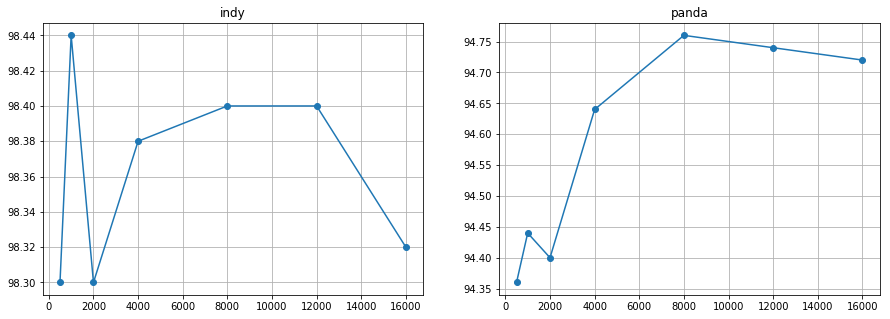

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(C_svm_list, test_indy_list, '-o')
plt.title("indy")
plt.grid()
plt.subplot(1,2,2)
plt.plot(C_svm_list, test_panda_list, '-o')
plt.title("panda")
plt.grid()

In [5]:
rtrain.load_and_learn(RobotType.indy7gripper, C_svm=8000)
rtrain.load_and_learn(RobotType.panda, C_svm=8000)

connection command:
indy0: False
trainset: 	323.6 ms/1 = 323.6 ms (323.58/323.58)
testset: 	79.7 ms/1 = 79.7 ms (79.696/79.696)

trainning accuracy = 99.52 %
test accuracy = 98.4 %
trainning success accuracy = 99.67 %
trainning failure accuracy = 99.38 %
test success accuracy = 98.56 %
test failure accuracy = 98.24 %
connection command:
panda0: False
trainset: 	1226.7 ms/1 = 1226.7 ms (1226.681/1226.681)
testset: 	306.2 ms/1 = 306.2 ms (306.169/306.169)

trainning accuracy = 95.63 %
test accuracy = 94.76 %
trainning success accuracy = 97.82 %
trainning failure accuracy = 92.32 %
test success accuracy = 96.73 %
test failure accuracy = 91.6 %


94.76

## load and test

In [6]:
rtrain.load_and_test(RobotType.indy7gripper)

connection command:
indy0: False
trainset: 	319.4 ms/1 = 319.4 ms (319.419/319.419)
testset: 	79.4 ms/1 = 79.4 ms (79.403/79.403)

trainning accuracy = 99.52 %
test accuracy = 98.4 %
trainning success accuracy = 99.67 %
trainning failure accuracy = 99.38 %
test success accuracy = 98.56 % (2462/2498)
test failure accuracy = 98.24 % (2458/2502)


98.4

In [7]:
rtrain.load_and_test(RobotType.panda)

connection command:
panda0: False
trainset: 	1221.9 ms/1 = 1221.9 ms (1221.875/1221.875)
testset: 	305.6 ms/1 = 305.6 ms (305.583/305.583)

trainning accuracy = 95.63 %
test accuracy = 94.76 %
trainning success accuracy = 97.82 %
trainning failure accuracy = 92.32 %
test success accuracy = 96.73 % (2983/3084)
test failure accuracy = 91.6 % (1755/1916)


94.76

## Update label

In [ ]:
from pkg.planning.filtering.reach_filter import *

In [ ]:
ROBOT_TYPE = RobotType.indy7
TIP_LINK = "indy0_tcp"
TIMEOUT = 0.3
DATA_DIVS = ["train", "test"]
UPDATE_LABELS = [True] # to reduce feasible ones, as joint limit is reduced

In [ ]:
time_lists = []
for DATA_DIV in DATA_DIVS:
    rtrain.update_label(robot_type=ROBOT_TYPE, tip_link=TIP_LINK, data_div=DATA_DIV, update_labels=UPDATE_LABELS, timeout=TIMEOUT)
    time_lists.append(deepcopy(rtrain.time_list))
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(sorted(time_lists[0]), '.')
plt.subplot(1,2,2)
plt.plot(sorted(time_lists[0]), '.')

## Load and visualize

In [ ]:
ROBOT_TYPE = RobotType.panda
TIP_LINK = "panda0_hand"
TIMEOUT = 0.5
DATA_DIV = "test"

In [ ]:
rtrain.load_and_visualize(robot_type=ROBOT_TYPE, tip_link=TIP_LINK, data_div=DATA_DIV, timeout=TIMEOUT)